# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек  
Выполнила студентка группы 9382 Голубева Валентина, вариант 70

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения
**Бинарный метод возведения числа в степень**  
Это один из методов возведения числа в необходимую степень $n \in N$. В методе степень представляем в двоичной системе счисления. Затем осуществляем просмотр бит слева направо, не учитывая первый бит(он всегда равен единице): если бит равен единице, то текущее число возводится в квадрат и умножается на исходное чило, если бит равен нулю, то текущее число возводится в квадрат.   
Количество операций умножения в бинарном методе равно: $\lambda(n) + \nu(n) - 1$, где $\lambda(n) = \lfloor log_2 n \rfloor, \ \nu(n)$ - количество единиц в двоичной записи числа

**Метод множителей возведения числа в в степень**  
Это один из методов возведения числа в необходимую степень $k \in N$. Если число простое, то возводим число в степень $k-1$, а затем домножаем на исходное.  
Если же число составное, тогда представлем степень числа как произведение $k = i\cdot j$, где $i$ - наименьший простой множитель числа $k$. После этого останется возвести число сначала в степень $i$, а затем полученное возвести в степень $j$. 

**Аддитивной цепочкой** для $n \in N$ называется последовательность натуральных чисел $a_0 = 1, a_1, a_2, \ldots , a_m = n$, где $a_i = a_j + a_k$, $k \le j < i$, $\forall  i = 1..m$  
Длина минимальной аддитивной цепочки для числа $n$ равна $l(n) = m$  
Для формулы длины аддитивной цепочки существует рекуррентная формула $l(n) = min\{l(n - 1) + 1, \ l_n\} + \sigma_n $,  
$$l_ p = \begin{cases} \infty, \ если \ p \ - \ простое \\ l(q)+l(\frac{p}{q}), \ если \ q - минимальный \ простой \ делитель \ p \end{cases}$$ 
, где $ \sigma_n = \{0, 1\}$

**Теорема Брауэра**  
Для числа $k < log_2 (log_2 n)$ справедливо: $l(n) < (1+k^{-1}) \cdot \lceil log_2 n \rceil + 2^{k-1} - k + 2$.  
Если $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, то:
* Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$
* Следствие 2: Одна из наилучших верхних оценок длины аддитивной цепочки имеет вид: $\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n)) ^ 2})$

**Алгоритм Яо**   
Алгоритм для вычисления аддитивной цепочки для заданного $n \in N$. Пусть даны некоторые два числа $ n,k \geq 2$, тогда $n$ можно представить как: $\sum_{i=0}^{j} с_i \cdot 2^{ik}$, где $c_j = 0$  
Пусть функция $d(z)$ - сумма чисел $2^{ik}\,\forall i: с_i = z$
Вначале в цепочке располагаются степени двойки $Y_k(n):\{1, 2, 4, 8,  \ldots , 2^{\lambda(n)}\}$, потом мы вычисляем $d(z)$, $\forall z \in \{1, 2, \ldots, 2 ^ {k-1} \}$, где $d(z) \neq 0$. Тогда для $z \cdot d(z) \ \ \forall z => n = \sum_{z=1}^{2^{k-1}}{z \cdot d(z)}$

**Звёздная цепочка**  
Это аддитивная цепочка, в которой текущий элемент получен сложением предыдущего и какого-то $a_k$, где $0 \leq k \leq i-1$: $a_i=a_{i-1}+a_k$  
Тогда, если $l^*(n)$ - минимальная звездная цепочка, то $l^*(n) \geq l(n)$  
Пусть дана ЗЦ длины $m - 1$. Для каждой ЗЦ существует **вектор индексов**: $\{r_i\}_{i=1}^{m-1}$ длины $m-1$, где $r_i = \{x: 1 \leq x \leq i\}$, тогда $a_i = a_{i-1} + a_{r_i - 1}$, где $2 \leq i \leq m-1$

**Алгоритм дробления вектора индексов**  
Для данного $n \in N$ надо найти $\min l^*(n) = m: a_m = n$  
* Во внешнем цикле будем рассматривать аддитивные цепочки длины $m$: $\underline{l}(n) \leq m \leq \overline{l}(n)$, где $1 \leq q \leq m - 1$, пусть $q = \frac{m}{2}$, $q \in N$
* Во внутреннем цикле перебираем все фиксированные части ВИ $\{r_i\}_{i=1}^{q}$ ($q!$ шагов)  
на каждом шаге строим $\{r_i\} -> \{a_i\}$, вычисляем $a_{min}$ и $a_{max}$  
    1. если на каком-то шаге $a_m = n \ -> done! $  
    2. если $n \notin [a_{min}, a_{max}] -> $ переходим к следующему набору $\{r_i\}_{i=1}^{q}$
    3. если $n \in [a_{min}, a_{max}] -> $ организуем внутренний цикл перебора меняющейся части $\{\rho_i\}_{q+1}^{m}$
    4. если $\rho_i = 1 \ \forall j \ -> $ переходим с слудующему $\{r_i\}_{i=1}^{q}$
* если $r_i = 1 \ \forall i$ и $\rho_i = 1 \ \forall j \ -> m = m + 1$ 
    
**Гипотеза Шольца - Брауэра**  
$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
Применить бинарный метод и метод множителей для $x ^ n$, где $n \ge 30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

Проверить следствие 1 теоремы Брауэра для $n \in 1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

Проверить гипотезу Шольца–Брауэра для $1 < n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.


## Бинарный метод и метод множителей  
Ниже представлена реализация бинарного метода и метода множителей (вместе со вспомогательными функциями)

In [1]:
def dec_to_bin(x):
    binary = bin(x)
    return binary[2::]

def binary_method(x, deg):
    deg1 = dec_to_bin(deg)
    res = x
    count = 0
    for i in range(1, len(deg1)):
        if deg1[i] == '1':
            res *= res
            res *= x
            count += 2
        elif deg1[i] == '0':
            res *= res
            count += 1
        
    return [res, count]

In [2]:
def min_simple_mul(x):
    if x%2 == 0:
        return 2
    i = 3
    while x%i != 0 and i*i <= x:
        i += 2
    if i*i <= x:
        return i
    else:
        return x
    
def mul_method(x, deg):
    min_mul =  min_simple_mul(deg)
    if min_mul == deg:
        deg -= 1
        deg1 = min_simple_mul(deg)
        res, count = binary_method(x, deg)
        res, count1 = binary_method(res, deg % deg1)
        count += count1
        res *= x
    else:
        res, count = binary_method(x, min_mul)
        res, count1 = binary_method(res, deg / min_mul)
        count += count1
    return [res, count]    

Применим бинарный метод и метод множителей, чтобы возвести цифру $1$ в степень $30$, $101$, $200$, $5006$, $31101$
Результаты занесём в табличку

Бинарный метод и метод множителей для числа 1:


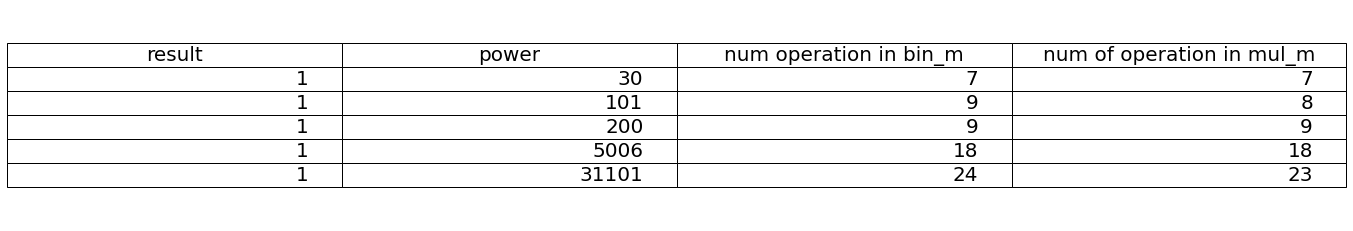

In [3]:
from matplotlib import pyplot as plt
table_res = []
for i in (30, 101, 200, 5006, 31101):
    bin_m_result = binary_method(1, i)
    mul_m_result = mul_method(1, i)
    row = [mul_m_result[0], i, bin_m_result[1], mul_m_result[1]]
    table_res.append(row)
    
headers = ['result', 'power', 'num operation in bin_m', "num of operation in mul_m"]
cell_text = []
for i in table_res:
    cell_text.append([data for data in i])

table = plt.table(cell_text, rowLoc='right', colLabels=headers, loc='center')
table.set_fontsize(20)
table.scale(4, 2) 

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
print('Бинарный метод и метод множителей для числа 1:')
plt.draw()

**Вывод**: как видно из таблички, метод множителей по количеству операций сопоставим с бинарным методом, лишь иногда его лучше, но ненамного

# Алгоритм Яо  
Ниже представлена реализация алгоритма Яо

In [3]:
def yao(n, k):
    res_chain = []
    i = 1
    while i < n:
        res_chain.append(i)
        i *= 2
    couples = []
    digits = n.digits(2**k)
    max_pow = len(digits)
    for i in range(max_pow):
        if digits[i] != 0:
            couples.append([digits[i], i * k])    
    end_sum = 0
    while couples:
        d_z = 0
        z = couples[0][0]
        for i in couples:
            if i[0] < z:
                z = i[0]
        d_z_list = []
        for i in couples:
            if i[0] == z:
                d_z += res_chain[i[1]]
                d_z_list.append(d_z)      
        for i in d_z_list:
            if i not in res_chain:
                res_chain.append(i)    
        add_chain = [d_z]
        bits = bin(z)[3:]
        res = d_z
        for i in bits:
            res *= 2
            add_chain.append(res)
            if i == '1':
                res += d_z
                add_chain.append(res)
        for i in add_chain:
            if i not in res_chain:
                res_chain.append(i)
        end_sum += add_chain[len(add_chain) - 1]
        if end_sum not in res_chain:
            res_chain.append(end_sum)
        new_couples = []
        for i in couples:
            if i[0] != z:
                new_couples.append(i)
        couples = new_couples   
    return [len(res_chain), res_chain]  

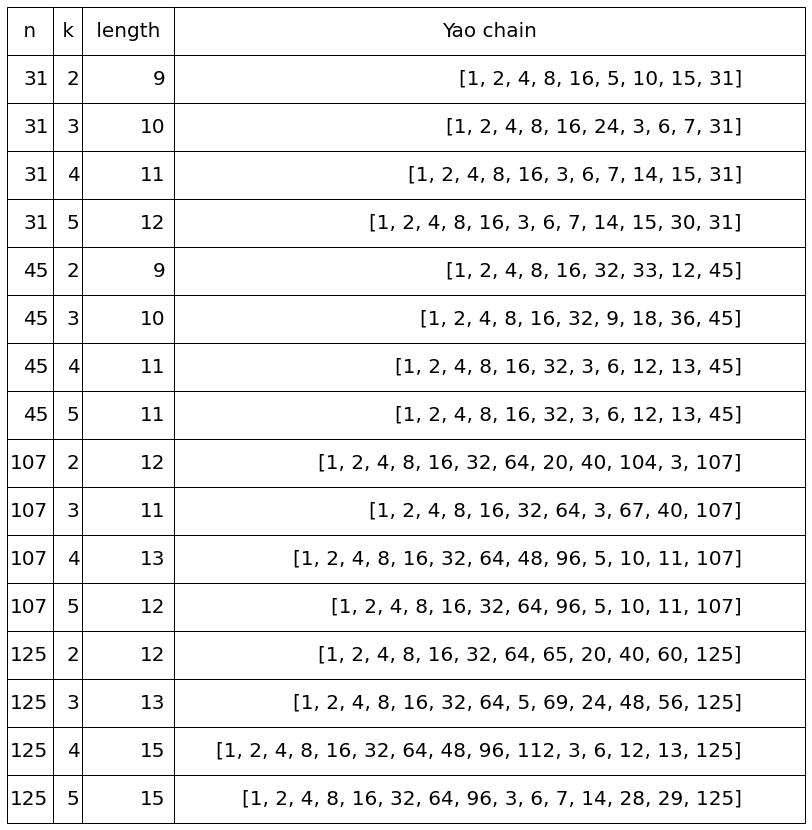

In [9]:
yao_chain_t = []
for n in (31, 45, 107, 125):
    for j in range(2,6):
        yao_chain = yao(n, j)
        row = [n, j, yao_chain[0], yao_chain[1]]
        yao_chain_t.append(row)
    
headers = [' n ',' k ', ' length ', 'Yao chain']

cell_text = []
for row in yao_chain_t:
    cell_text.append([data for data in row])

table = plt.table(cell_text, rowLoc='right', colLabels=headers, loc='center')

table.auto_set_font_size(False)
table.auto_set_column_width(col=list(range(4)))
table.set_fontsize(20)
table.scale(2, 4) 


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.box(on=None)
plt.draw()

Минимальные аддитивные цепочки для чисел $31$, $45$, $107$, $125$  

| $n$ | $length$ | $chain$ |  
| :-: | :-: | :-: |
| 31 | 8 | [1, 2, 3, 6, 12, 15, 30, 31] |
| 45 | 8 | [1, 2, 4, 5, 10, 20, 40, 45] |
| 107 | 10 | [1, 2, 3, 6, 12, 13, 26, 52, 104, 107] |
| 125 | 10 | [1, 2, 4, 5, 10, 15, 30, 60, 120, 125] |

**Вывод**: как видно по данным из таблиц алгоритм Яо ни разу не нашёл минимальную аддитивную цепочку для заданного числа. При варьировании параметра $k$ получаются цепочки разной длины, но зависимости не наблюдается.

# Алгоритм дробления вектора индексов  
Ниже представлена реализация алгоритма дробления ви для построения звёздной цепочки

In [1]:
import math
def dec_to_bin(x):
    binary = bin(x)
    return binary[2::]

def min_chain_v(n):
    chain = []
    for i in range (1, n + 1):
        chain.append(1)
    return chain 

def max_chain_v(n, q):
    chain = []
    for i in range (1, n + 1):
        chain.append(i + q)
    return chain

def reduce_vec(indexes_vector, q = 0):
    for ind, val in reversed(list(enumerate(indexes_vector))):
        if val > 1:
            indexes_vector[ind] = val - 1
            for k in range(ind + 1, len(indexes_vector)):
                indexes_vector[k] = k + q + 1
            return indexes_vector
    return indexes_vector

def star_chain(indexes_vector):
    s_chain = [1]
    for i in indexes_vector:
        s_chain.append(s_chain[-1] + s_chain[i-1])
    return s_chain

def check_ones(indexes_vector):
    for i in indexes_vector:
        if i != 1:
            return False
    return True
            
def split_indexes_vector(n):
    vec = []
    for m in range(int(math.log(n,2)), int(math.log(n,2))+ int(dec_to_bin(n).count('1'))):
        indexes_vector = []
        q = m // 2
        if q == 0:
            q = 1
        for i in range(1, q + 1):
            indexes_vector.append(i) 
        while not check_ones(indexes_vector):
            add_vector_len = m - q
            max_vec = max_chain_v(add_vector_len, q)
            min_chain = star_chain(indexes_vector + min_chain_v(add_vector_len))
            max_chain = star_chain(indexes_vector + max_vec)
            a_min = min_chain[-1]
            a_max = max_chain[-1]
            if a_min == n:
                return [len(min_chain), min_chain]
            if a_max == n:
                return [len(max_chain), max_chain]
            if n < a_max and n > a_min:
                while not check_ones(max_vec):
                    max_vec = reduce_vec(max_vec, q)
                    new_chain = star_chain(indexes_vector + max_vec)
                    if new_chain[-1] == n:
                        return [len(new_chain), new_chain]  
            indexes_vector = reduce_vec(indexes_vector)
        vec = indexes_vector
    res_chain = star_chain(vec)
    return [len(res_chain), res_chain]


Алгоритм был применен для чисел $505$, $555$, $606$, $707$

| $n$ | $time$ | $star \ length$ | $star \ chain$ | $yao \ chain \ length$ | $min chain \ length$ |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 505 | 784.2233228683472 | 13 | [1, 2, 4, 8, 16, 32, 64, 128, 160, 162, 324, 486, 502]| 15 | 13 |
| 555 | 700.615957736969 | 13 | [1, 2, 4, 8, 16, 32, 64, 72, 136, 137, 209, 418, 555] | 15 | 13 |
| 606 | 601.6591656208038 | 13 | [1, 2, 4, 8, 16, 32, 64, 128, 192, 200, 202, 404, 606] | 16 | 13 |
| 707 | 428.463773727417 | 13 | [1, 2, 4, 8, 16, 32, 64, 128, 192, 193, 386, 579, 707] | 14 | 13 |

**Вывод**: алгоритм дробления вектора индексов всегда выдаёт минимальную по длине аддитивную цепочку, в отличие от алгоритма Яо, который выдаёт цепочки большей длины. Но по времени алгоритм крайне неэффективен.

# Проверка следствия теоремы Брауэра 

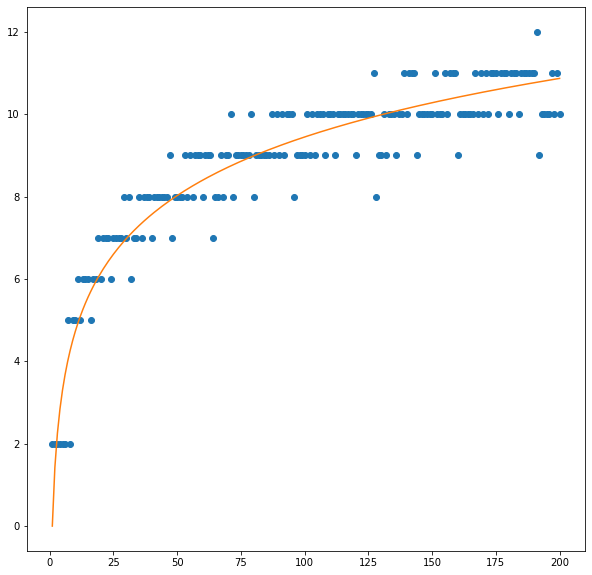

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq

def get_values(n):
    dig = [i for i in range(1, n + 1)]
    res = []
    for i in range(1, n + 1):
        x, y = split_indexes_vector(i)
        res.append(x)
    return dig, res    

n = 200
num, res = get_values(n)

def model(t, coeffs):
    return np.log(t)*coeffs[0]

def residuals(coeffs, y, t):
    return  y - model(t, coeffs)

figure, axes = plt.subplots(figsize = (10,10))
p, flag = leastsq(residuals, 1, args=(res, num))
plt.plot(num, res, 'o',  num, model(num, p))
plt.show()

**Вывод**: как видно из графика, значения длин аддитивных цепочек апроксимируется логарифмической кривой, это подтверждаем следствие теоремы Брауэра, что значение длины аддитивной цепочки и функции логарифма эквивалентны на бесконечности, также из этого можно сделать вывод, что на бесконечности длина аддитивной цепочки будет расти очень медленно 

# Проверка гипотезы Шольца - Брауэра
Была проведена проверка гипотезы Шольца-Брауэра($l^*(2^n-1) \leq l^*(n) + n - 1$) на алгоритме дробления ви, результаты были занесены в таблицу ниже

| $n$ | $l^*(2^n - 1)$ | $l^*(n) + n - 1$ |
| :-: | :-: | :-: |
| 2 | 3 | 3 | 
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |

**Вывод**: для чисел $\leq 10$ гипотеза справедлива. Основываясь на этой гипотезе можно уменьшить время работы алгоритма перебора ви, потому что мы будем знать примерную длину аддитивной цепочки.

# Общий вывод  
Было сформировано представление об аддитивных цепочках, было выработано умение применять алгоритмы Яо и дробления вектора индексов для нахождения аддитивных цепочек для заданного числа, алгоритм Яо работал быстро, но не находил цепочек минимальной длины, а алгоритм дробления ви находил цепочки минимальной длины, но оказался крайне затратным по времени, были проверены следствие теоремы Брауэра и гипотеза Шольца - Брауэра о длине аддитивных цепочек - оба оказались верными, были изучены системы компьютерной алгебры для реализации алгоритмов